In [1]:
%load_ext autoreload
%autoreload 2
from helper import create_tsp_graph,plot_tsp_graph,bitstring_to_path,cost
from classical import solve_tsp_classical
from alternating_operator import get_expectation,analyse_result
from scipy.optimize import minimize
from qiskit.tools.visualization import plot_histogram

In [41]:
G = create_tsp_graph(4)

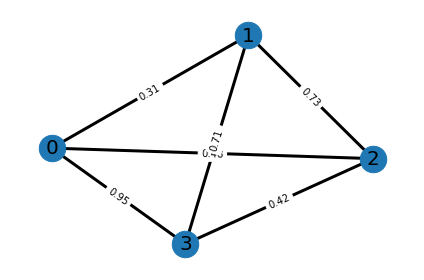

In [42]:
plot_tsp_graph(G)

In [49]:
reps = 2
expectation = get_expectation(G,reps,shots=512)

res = minimize(expectation, 
                      [1. for _ in range(reps*4)], 
                      method='COBYLA')

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be exp

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.
Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be exp

In [50]:
res

     fun: 2.300752570895368
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 87
  status: 1
 success: True
       x: array([1.        , 1.        , 1.        , 1.        , 2.25424868,
       0.5714522 , 1.        , 0.95788775])

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


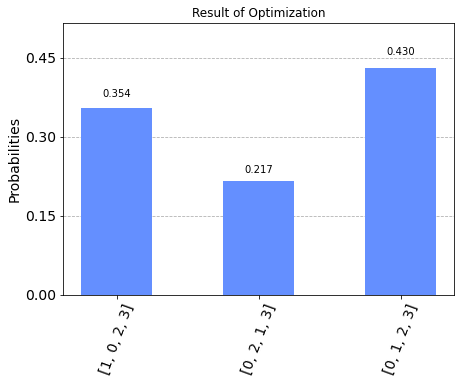

In [51]:
fig,counts = analyse_result(G,res.x,transform_labels_to_path=True)
fig

In [52]:
for key, val in counts.items():
    if val>1:
        path = bitstring_to_path(key)
        print(path,':', val , f"   cost = {round(cost(G,path),2)}")

[0, 2, 1, 3] : 222    cost = 2.88
[0, 1, 2, 3] : 440    cost = 2.41
[1, 0, 2, 3] : 362    cost = 1.92


In [53]:
from itertools import permutations
for p in permutations([0,1,2,3]):
    print(p,':',cost(G,p))

(0, 1, 2, 3) : 2.4140683676629897
(0, 1, 3, 2) : 1.9231342946364431
(0, 2, 1, 3) : 2.877519871035242
(0, 2, 3, 1) : 1.9231342946364431
(0, 3, 1, 2) : 2.877519871035242
(0, 3, 2, 1) : 2.4140683676629897
(1, 0, 2, 3) : 1.923134294636443
(1, 0, 3, 2) : 2.4140683676629897
(1, 2, 0, 3) : 2.877519871035242
(1, 2, 3, 0) : 2.4140683676629897
(1, 3, 0, 2) : 2.8775198710352425
(1, 3, 2, 0) : 1.923134294636443
(2, 0, 1, 3) : 1.923134294636443
(2, 0, 3, 1) : 2.8775198710352425
(2, 1, 0, 3) : 2.4140683676629897
(2, 1, 3, 0) : 2.877519871035242
(2, 3, 0, 1) : 2.4140683676629897
(2, 3, 1, 0) : 1.923134294636443
(3, 0, 1, 2) : 2.4140683676629897
(3, 0, 2, 1) : 2.877519871035242
(3, 1, 0, 2) : 1.9231342946364431
(3, 1, 2, 0) : 2.877519871035242
(3, 2, 0, 1) : 1.923134294636443
(3, 2, 1, 0) : 2.4140683676629897


In [54]:
solve_tsp_classical(G)

([1, 0, 2, 3], 1.923134294636443)

In [55]:
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from alternating_operator import create_initial_state_circuit,create_mixer_operator,create_phase_separator
from qaoa import build_cost
from qiskit.circuit import Parameter
from qiskit import Aer

In [56]:
qaoa = QAOA(optimizer=COBYLA(),reps=2,initial_state =create_initial_state_circuit(4),mixer = create_mixer_operator(4),quantum_instance=Aer.get_backend('aer_simulator'))

In [58]:
cost_ham = build_cost(1.,3,G)

phase_sep = create_phase_separator(G)

params = [Parameter(i) for i in ['a','b','c','d']]

qc = qaoa.construct_circuit(params,phase_sep)[0]

ValueError: Mismatching number of values and parameters. For partial binding please pass a dictionary of {parameter: value} pairs.

In [59]:
res = qaoa.compute_minimum_eigenvalue(phase_sep)

In [60]:
res.eigenstate

{'0010100001000001': 0.09882117688026186,
 '0100001010000001': 0.03125,
 '0100100000010010': 0.11267347735824966,
 '0100100000100001': 0.32021721143623744,
 '1000000101000010': 0.06987712429686843,
 '1000001000010100': 0.03125,
 '1000001001000001': 0.27775607554111215,
 '1000010000010010': 0.32021721143623744,
 '1000010000100001': 0.8297448779594846}

In [61]:
from collections import OrderedDict
import numpy as np
def sample_most_likely(state_vector):
    """Compute the most likely binary string from state vector.
    Args:
        state_vector (numpy.ndarray or dict): state vector or counts.
    Returns:
        numpy.ndarray: binary string as numpy.ndarray of ints.
    """
    if isinstance(state_vector, (OrderedDict, dict)):
        # get the binary string with the largest count
        binary_string = sorted(state_vector.items(), key=lambda kv: kv[1])[-1][0]
        x = np.asarray([int(y) for y in reversed(list(binary_string))])
        return x
    elif isinstance(state_vector, StateFn):
        binary_string = list(state_vector.sample().keys())[0]
        x = np.asarray([int(y) for y in reversed(list(binary_string))])
        return x
    else:
        n = int(np.log2(state_vector.shape[0]))
        k = np.argmax(np.abs(state_vector))
        x = np.zeros(n)
        for i in range(n):
            x[i] = k % 2
            k >>= 1
        return x

In [62]:
x = sample_most_likely(res.eigenstate)

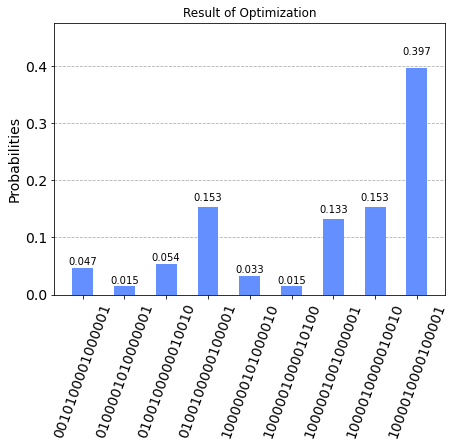

In [63]:
plot_histogram(res.eigenstate, title='Result of Optimization')

In [64]:
x

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])